In [1]:
# model architecture modified from https://keras.io/examples/vision/mnist_convnet/

In [2]:
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, Flatten, Softmax, Dense, Lambda, BatchNormalization, ReLU
from tensorflow.keras import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [5]:
#reshaping
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [6]:
inputs = Input(shape=(28,28,1))
out = Lambda(lambda x: x/1000)(inputs)
out = Conv2D(4, 3, use_bias=False)(out)
out = BatchNormalization()(out)
out = ReLU()(out)
# out = Lambda(lambda x: x**2+x)(out)
out = AveragePooling2D()(out)
# out = Lambda(lambda x: x*4)(out)
out = Conv2D(8, 3, use_bias=False)(out)
out = BatchNormalization()(out)
out = ReLU()(out)
# out = Lambda(lambda x: x**2+x)(out)
out = AveragePooling2D()(out)
# out = Lambda(lambda x: x*4)(out)
out = Flatten()(out)
out = Dense(10, activation=None)(out)
out = Softmax()(out)
model = Model(inputs, out)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
lambda (Lambda)              (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 4)         36        
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 4)         16        
_________________________________________________________________
re_lu (ReLU)                 (None, 26, 26, 4)         0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 8)         288   

In [8]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics=['acc']
    )

In [9]:
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3852 - acc: 0.8843 - val_loss: 0.0964 - val_acc: 0.9703
Epoch 2/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0878 - acc: 0.9740 - val_loss: 0.0707 - val_acc: 0.9770
Epoch 3/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0677 - acc: 0.9793 - val_loss: 0.0647 - val_acc: 0.9785
Epoch 4/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0598 - acc: 0.9818 - val_loss: 0.0611 - val_acc: 0.9811
Epoch 5/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0555 - acc: 0.9827 - val_loss: 0.0592 - val_acc: 0.9817
Epoch 6/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0506 - acc: 0.9833 - val_loss: 0.0720 - val_acc: 0.9768
Epoch 7/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0454 - acc: 0.9852 - val_loss: 0.0496 - val_acc: 0.9850
Epoch 8/15
1875/1875 [==============================] - 3s 1ms

In [10]:
X = X_test[0]
X.shape, X.min(), X.max()

((28, 28, 1), 0, 255)

In [11]:
model2 = Model(model.input, model.layers[-2].output)

In [12]:
model2.predict(X_test[[0]]) - model.layers[-2].weights[1].numpy()

array([[ -6.2468867,  -6.3268614,   5.410377 ,   5.8547926,  -5.245466 ,
         -3.587707 , -17.595942 ,  17.122202 ,  -2.3852873,   3.7686806]],
      dtype=float32)

In [13]:
model.predict(X_test[[0]])

array([[6.3815404e-11, 6.2323799e-11, 8.0492591e-06, 1.0712383e-05,
        1.7036507e-10, 1.0719555e-09, 7.9848600e-16, 9.9997973e-01,
        4.0607868e-09, 1.3976586e-06]], dtype=float32)

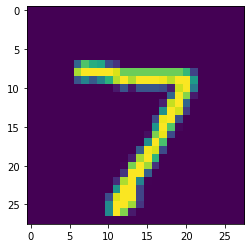

In [14]:
plt.imshow(X)

In [15]:
print(len(model.weights))
for weights in model.weights:
    print(weights.shape)

12
(3, 3, 1, 4)
(4,)
(4,)
(4,)
(4,)
(3, 3, 4, 8)
(8,)
(8,)
(8,)
(8,)
(200, 10)
(10,)


In [16]:
gamma = model.layers[3].weights[0].numpy()
beta = model.layers[3].weights[1].numpy()
moving_mean = model.layers[3].weights[2].numpy()
moving_var = model.layers[3].weights[3].numpy()
epsilon = model.layers[3].epsilon

In [17]:
a1 = gamma/(moving_var+epsilon)**.5
b1 = beta-gamma*moving_mean/(moving_var+epsilon)**.5
a1, b1

(array([ 8.792204,  9.772785, 10.312538,  8.802087], dtype=float32),
 array([-1.1708343 , -0.05037522, -1.342272  , -0.06242919], dtype=float32))

In [18]:
gamma = model.layers[7].weights[0].numpy()
beta = model.layers[7].weights[1].numpy()
moving_mean = model.layers[7].weights[2].numpy()
moving_var = model.layers[7].weights[3].numpy()
epsilon = model.layers[7].epsilon

In [19]:
a2 = gamma/(moving_var+epsilon)**.5
b2 = beta-gamma*moving_mean/(moving_var+epsilon)**.5
a2, b2

(array([1.4212797, 1.5523269, 1.5874738, 1.593189 , 2.330205 , 1.5186743,
        1.3124124, 1.6141205], dtype=float32),
 array([-0.939713  , -0.15037137, -1.5690781 ,  1.2707491 , -0.06281102,
        -1.2463849 ,  0.5863233 , -0.38434148], dtype=float32))

In [20]:
in_json = {
    "in": X.astype(int).flatten().tolist(), # X is already 1000 times to begin with
    "conv2d_1_weights": (model.layers[2].weights[0].numpy()*(10**3)).round().astype(int).flatten().tolist(),
    "conv2d_1_bias": (np.array([0]*4)*(10**3)**2).round().astype(int).flatten().tolist(),
    "bn_1_a": (a1*(10**3)).round().astype(int).flatten().tolist(),
    "bn_1_b": (b1*(10**3)**3).round().astype(int).flatten().tolist(),
    # average pooling will scale another 10**2 times
    "conv2d_2_weights": (model.layers[6].weights[0].numpy()*(10**3)).round().astype(int).flatten().tolist(),
    "conv2d_2_bias": (np.array([0]*8)*(10**(3*4+2))).round().astype(int).flatten().tolist(),
    "bn_2_a": (a2*(10**3)).round().astype(int).flatten().tolist(),
    "bn_2_b": (b2*(10**(3*5+2))).round().astype(int).flatten().tolist(),
    # average pooling will scale another 10**2 times
    "dense_weights":(model.layers[11].weights[0].numpy()*(10**3)).round().astype(int).flatten().tolist(),
    "dense_bias": np.zeros(model.layers[11].weights[1].numpy().shape).tolist() # zero because we are not doing softmax in circom, just argmax
}

In [21]:
import json

In [22]:
with open("mnist_latest_optimized_input.json", "w") as f:
    json.dump(in_json, f)